In [136]:
%matplotlib inline
import pandas as pd
import numpy as np
import spacy
from spacy.en import English
from nltk import sent_tokenize
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from scipy import spatial
from scipy.stats.stats import pearsonr
import seaborn as sns

In [2]:
def w2vsim(text, vector, spacy_mod, w2v_mod):
    w = spacy_mod.tokenizer(text.decode('utf8'))
    if w.orth_ in w2v_mod.vocab:
        text_vec = model.word_vec(w.orth_)
    else:
        return(0)

    return(1-spatial.distance.cosine(vector, text_vec))

In [3]:
nlp = spacy.load('en')

In [5]:
model = KeyedVectors.load_word2vec_format('../../w2v/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [63]:
time_vec = np.mean([model.word_vec('time'), model.word_vec('future'), 
                    model.word_vec('past')], axis=0)
people_vec = np.mean([model.word_vec('people'), model.word_vec('friends'), 
                    model.word_vec('family')], axis=0)
happy_vec = np.mean([model.word_vec('happy'), model.word_vec('joy')], axis=0),
prac_vec = np.mean([model.word_vec('practical'), model.word_vec('pragmatic'),
                   model.word_vec('logical')], axis=0)
df = pd.read_csv('../word_topic_deflections.csv')

In [64]:
df['time'] = df.words.apply(w2vsim, args=[time_vec, nlp, model])
df['people'] = df.words.apply(w2vsim, args=[people_vec, nlp, model])
df['happy'] = df.words.apply(w2vsim, args=[happy_vec, nlp, model])
df['prac'] = df.words.apply(w2vsim, args=[prac_vec, nlp, model])

In [65]:
df.sort_values('prac', ascending=False)

,words,low,med,high,time,people,happy,prac
2759,utilitarian,0.011623,0.000000,0.000000,-0.006959,0.075608,0.086016,0.499563
1759,obvious,0.000000,0.000000,0.000000,0.149469,0.071043,0.189715,0.492539
2873,wise,-0.027742,0.000000,0.000000,0.184211,0.090850,0.171848,0.415224
124,approach,0.000000,0.000000,0.024791,0.163960,0.060703,0.055173,0.412223
2044,realist,-3.463642,-9.344579,-4.172251,0.066393,0.101018,0.195466,0.404703
2344,smart,-3.547405,-3.035489,-3.757712,0.137201,0.110847,0.159657,0.398128
2345,smarter,0.000000,-0.027742,0.000000,0.169670,0.104405,0.168949,0.391570
1282,ideal,-3.157668,-3.251334,-8.620198,0.156790,0.040650,0.221973,0.385197
472,clear,-0.200624,0.000000,0.000000,0.142365,0.082619,0.140810,0.373182
2384,sort,0.000000,0.000000,0.000000,0.256667,0.164547,0.211574,0.367986


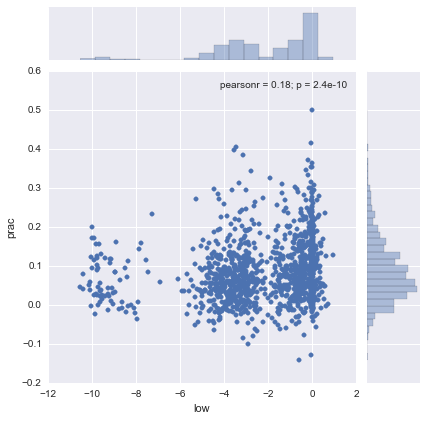

In [68]:
subdat = df[(df.low!=0) & (df.prac!=0)]
sns.jointplot(subdat.low, subdat.prac)

Code below calculates correlations between every word in word2vec model and the stm coefficients

In [ ]:
df_results = pd.DataFrame({'words':model.index2word,
                          'low_cor':0,
                          'med_cor':0,
                          'high_cor':0})
low_cor = [0]*len(model.index2word)
med_cor = [0]*len(model.index2word)
high_cor = [0]*len(model.index2word)
for i, word in enumerate(model.index2word):
    tempvec = model.word_vec(word)
    df['temp'] = df.words.apply(w2vsim, args=[tempvec, nlp, model])
    
    low_cor[i] = pearsonr(df.temp, df.low)[0]
    med_cor[i] = pearsonr(df.temp, df.med)[0]
    high_cor[i] = pearsonr(df.temp, df.high)[0]


In [149]:
low_cor = [0]*len(model.index2word)

In [150]:
low_cor[7] = 2

In [152]:
pearsonr(df['temp'], df.low)[0]

0.12788015531178859